In [1]:
import numpy as np
from matplotlib import pyplot as plt
from curve import Curve
from curve import Point

Функции для задания кривой, 1ая, 2ая и 3я производные:

In [2]:
def x(t):
    return t**2
def y(t):
    return np.exp(t) + 3
def z(t):
    return 3*t + 2

def der_x(t):
    return 2*t
def der_y(t):
    return np.exp(t)
def der_z(t):
    return 3

def sec_der_x(t):
    return 2
def sec_der_y(t):
    return np.exp(t)
def sec_der_z(t):
    return 0

def thd_der_x(t):
    return 0
def thd_der_y(t):
    return np.exp(t)
def thd_der_z(t):
    return 0

In [3]:
%matplotlib widget

0.0 0.31622776601683794 0.9486832980505138
-0.42857142857142855 0.8571428571428571 -0.2857142857142857
<class 'curve.Point'>
-0.9035079029052511 -0.406578556307363 0.13552618543578768
0.0
0.0
-3.469446951953614e-17


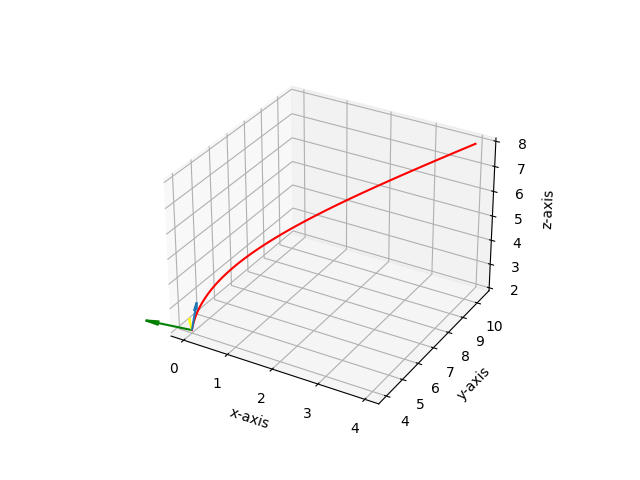

In [4]:

k = [x(0), y(0), z(0)]
b = Point(*k)
c = Point(der_x(0), der_y(0), der_z(0))
d = Point(sec_der_x(0), sec_der_y(0), sec_der_z(0))
print(b.speed(c).x, b.speed(c).y, b.speed(c).z)
print(b.bi_normal(c, d).x, b.bi_normal(c, d).y, b.bi_normal(c, d).z)
print(type(b.bi_normal(c, d)))
print(b.normal(c,d).x, b.normal(c,d).y, b.normal(c,d).z)



t = np.linspace(0, 2, 100)
x_axis = [x(i) for i in t]
y_axis = [y(i) for i in t]
z_axis = [z(i) for i in t]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(x_axis, y_axis, z_axis, 'red')


ax.quiver(b.x, b.y, b.z, b.speed(c).x, b.speed(c).y,  b.speed(c).z)
ax.quiver(b.x, b.y, b.z, b.normal(c,d).x, b.normal(c,d).y, b.normal(c,d).z, color = 'green')
ax.quiver(b.x, b.y, b.z, b.bi_normal(c, d).x, b.bi_normal(c, d).y, b.bi_normal(c, d).z, color = 'yellow')


print(b.speed(c).scalar_product(b.normal(c, d)))
print(b.speed(c).scalar_product(b.bi_normal(c, d)))
print(b.normal(c,d).scalar_product(b.bi_normal(c,d)))
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

plt.show()

In [7]:

b1 = Point(x(0), y(0), z(0))
c1 = Point(der_x(0), der_y(0), der_z(0))
d1 = Point(sec_der_x(0), sec_der_y(0), sec_der_z(0))


b2 = Point(x(0.5), y(0.5), z(0.5))
c2 = Point(der_x(0.5), der_y(0.5), der_z(0.5))
d2 = Point(sec_der_x(0.5), sec_der_y(0.5), sec_der_z(0.5))




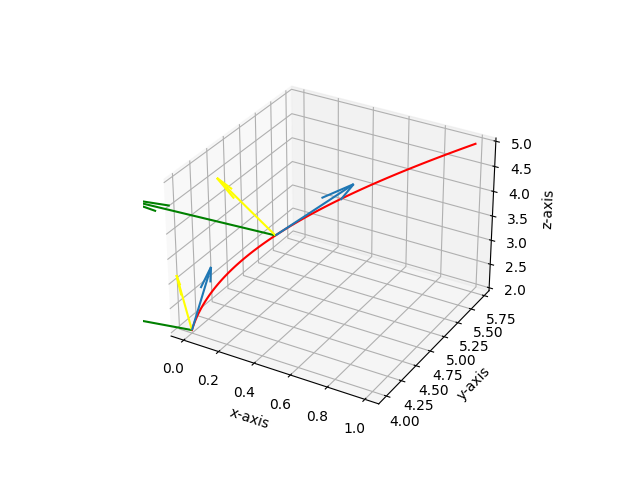

In [9]:


t = np.linspace(0, 1, 100)
x_axis = [x(i) for i in t]
y_axis = [y(i) for i in t]
z_axis = [z(i) for i in t]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(x_axis, y_axis, z_axis, 'red')


ax.quiver(b1.x, b1.y, b1.z, b1.speed(c1).x, b1.speed(c1).y,  b1.speed(c1).z)
ax.quiver(b1.x, b1.y, b1.z, b1.normal(c1,d1).x, b1.normal(c1,d1).y, b1.normal(c1,d1).z, color = 'green')
ax.quiver(b1.x, b1.y, b1.z, b1.bi_normal(c1, d1).x, b1.bi_normal(c1, d1).y, b1.bi_normal(c1, d1).z, color = 'yellow')

ax.quiver(b2.x, b2.y, b2.z, b2.speed(c2).x, b2.speed(c2).y,  b2.speed(c2).z)
ax.quiver(b2.x, b2.y, b2.z, b2.normal(c2,d2).x, b2.normal(c2,d2).y, b2.normal(c2,d2).z, color = 'green')
ax.quiver(b2.x, b2.y, b2.z, b2.bi_normal(c2, d2).x, b2.bi_normal(c2, d2).y, b2.bi_normal(c2, d2).z, color = 'yellow')


ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

plt.show()

MovieWriter Pillow unavailable; using Pillow instead.


IndexError: list index out of range

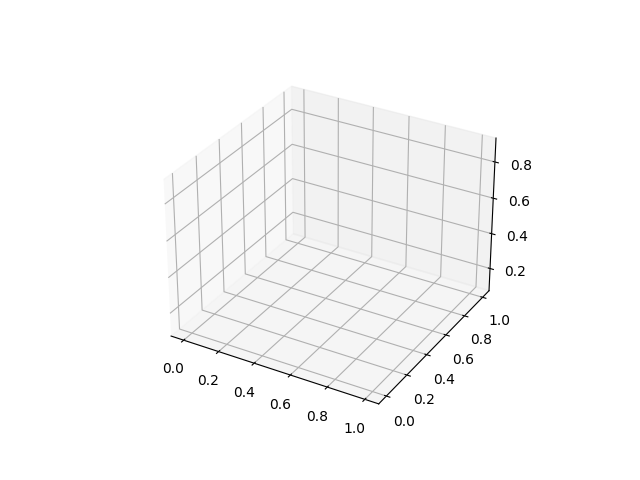

In [15]:
import numpy as np

import matplotlib.animation as animation

def init():
    line1.set_data([], [])


    return line1
def redraw(i):

    global xC, xP, yP
    n=i/10
    t=np.linspace(0,n,100)

    line1.set_data(x_axis, y_axis, z_axis)

    return line1

Radius = 15

fig = plt.figure()
fig.set_dpi(200)

ax = fig.add_subplot(projection='3d')

line1, = ax.plot([], [], [], lw=2)
# line2, = ax.plot([], [],'r')
# xC=0;yC=Radius; xP=0; yP=0
# pc = plt.Circle((xC, yC), Radius, color='purple')
# pp = plt.Circle((xP, yP), Radius/10, fc='k')
ax.set_aspect('equal')
anim =animation.FuncAnimation(fig, redraw, init_func=init,
frames=150, interval=50, blit=True)
anim.save('spinning_circle.gif', writer='Pillow')